In [97]:
#Importing the libraries for building Emotion Classifier
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.feature_extraction.text as text
from sklearn.decomposition import NMF, LatentDirichletAllocation,TruncatedSVD
from sklearn import model_selection, preprocessing, linear_model,naive_bayes, metrics, svm
import xgboost
from sklearn import decomposition, ensemble
import numpy, textblob, string
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('ISEAR_dataset.csv')
data.drop('Unnamed: 2', axis=1, inplace=True)
data.head()

,sentiment,content
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  7516 non-null   object
 1   content    7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


In [4]:
data.shape

(7516, 2)

In [5]:
data['sentiment'].unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt',
       'guit'], dtype=object)

In [6]:
data.describe()

,sentiment,content
count,7516,7516
unique,8,7449
top,joy,When my grandfather died.
freq,1092,8


# Data Cleaning and Preprocessing

### 1-Lowercase
### 2-Remove special characters
### 3-Remove punctuation
### 4-Remove stop words
### 5-Correct spelling
### 6-Normalization

In [7]:
# Convert uppercase letters to lowercase.
data['content'] = data['content'].apply(lambda a: " ".join(a.lower() for a in a.split()))

In [8]:
data.head(5)

,sentiment,content
0,joy,on days when i feel close to my partner and ot...
1,fear,every time i imagine that someone i love or i ...
2,anger,when i had been obviously unjustly treated and...
3,sadness,when i think about the short time that we live...
4,disgust,at a gathering i found myself involuntarily si...


In [9]:
# Remove white space and special characters.
data['content'] = data['content'].apply(lambda a: " ".join(a.replace('[^\w\s]','') for a in a.split()))

In [10]:
# Remove the stop words.
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda a: " ".join(a for
a in a.split() if a not in stop))

In [11]:
data.head(5)

,sentiment,content
0,joy,days feel close partner friends. feel peace al...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucida...
3,sadness,think short time live relate periods life thin...
4,disgust,gathering found involuntarily sitting next two...


In [12]:
# Correct spelling.
data['content'] = data['content'].apply(lambda a:str(TextBlob(a).correct()))

In [13]:
data.head()

,sentiment,content
0,joy,days feel close partner friends. feel peace al...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucida...
3,sadness,think short time live relate periods life thin...
4,disgust,gathering found involuntarily sitting next two...


In [14]:
# Do stemming.
st = PorterStemmer()
data['content'] = data['content'].apply(lambda a: " ".join([st.stem(word) for word in a.split()]))

In [15]:
data.head()

,sentiment,content
0,joy,day feel close partner friends. feel peac also...
1,fear,everi time imagin someon love could contact se...
2,anger,obvious unjustli treat possibl elucid this.
3,sadness,think short time live relat period life think ...
4,disgust,gather found involuntarili sit next two peopl ...


In [16]:
data['sentiment'].value_counts()

sentiment
joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1049
guit          1
Name: count, dtype: int64

In [19]:
# droping guit row 
data = data[data['sentiment'] != 'guit']

In [21]:
data['sentiment'].value_counts()

sentiment
joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1049
Name: count, dtype: int64

In [23]:
#Labels encode the target variable
object = preprocessing.LabelEncoder()
data['sentiment'] = object.fit_transform(data['sentiment'])

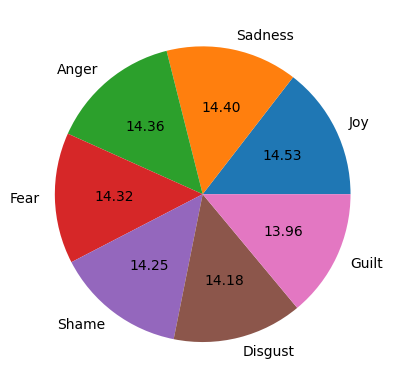

In [103]:
plt.pie(data['sentiment'].value_counts() , labels = ['Joy','Sadness','Anger','Fear','Shame','Disgust','Guilt'] , autopct = '%0.2f')
plt.show()

In [73]:
#train-test split
Xtrain , Xtest , Ytrain , Ytest = model_selection.train_test_split(data['content'], data['sentiment'],stratify= data['sentiment'])

In [74]:
# CountVectorizer
cv = CountVectorizer()
cv.fit(data['content'])
cv_xtrain = cv.transform(Xtrain)
cv_xtest = cv.transform(Xtest)

In [75]:
# TF-IDF
tv = TfidfVectorizer()
tv.fit(data['content'])
tv_xtrain = tv.transform(Xtrain)
tv_xtest = tv.transform(Xtest)

In [76]:
def build(model_initializer, independent_variables_training, target,independent_variable_test):
    # fit
    model_initializer.fit(independent_variables_training, target)
    # predict
    modelPred=model_initializer.predict(independent_variable_test)
    return metrics.accuracy_score(modelPred, Ytest)

 # Naive Bayes

In [79]:
#Multinomial on countvector
output = build(naive_bayes.MultinomialNB(), cv_xtrain, Ytrain, cv_xtest)
print(output)

0.5651942522618414


In [78]:
#Multinomial on TfidfVectorizer
output = build(naive_bayes.MultinomialNB(), tv_xtrain, Ytrain, tv_xtest)
print(output)

0.5731772219265566


In [80]:
#GaussianNB on countvector
output = build(naive_bayes.GaussianNB(), cv_xtrain.toarray(), Ytrain, cv_xtest.toarray())
print(output)

0.35071846726982436


In [81]:
#GaussianNB on TfidfVectorizer
output = build(naive_bayes.GaussianNB(), tv_xtrain.toarray(), Ytrain, tv_xtest.toarray())
print(output)

0.35763704097924426


In [82]:
#BernoulliNB on countvector
output = build(naive_bayes.BernoulliNB(), cv_xtrain, Ytrain, cv_xtest)
print(output)

0.5673230441724322


In [83]:
#BernoulliNB on TfidfVectorizer
output = build(naive_bayes.BernoulliNB(), tv_xtrain, Ytrain, tv_xtest)
print(output)

0.5673230441724322


# Linear Classifier/Logistic Regression

In [84]:
# for CV
output = build(linear_model.LogisticRegression(), cv_xtrain, Ytrain,cv_xtest)
print(output)

0.5646620542841937


In [85]:
# for TF-IDF
output = build(linear_model.LogisticRegression(), tv_xtrain, Ytrain,tv_xtest)
print(output)

0.5827567855242151


# Support-Vector Machine

In [86]:
#for cv
output = build(svm.SVC(), cv_xtrain, Ytrain, cv_xtest)
print(output)

0.5470995210218201


In [87]:
#for TF-IDF
output = build(svm.SVC(), tv_xtrain, Ytrain, tv_xtest)
print(output)

0.5774348057477382


# Random forest

In [107]:
#for CV
output = build(ensemble.RandomForestClassifier(), cv_xtrain, Ytrain,cv_xtest)
print(output)

0.5481639169771155


In [88]:
#for TF-IDF
output = build(ensemble.RandomForestClassifier(), tv_xtrain, Ytrain,tv_xtest)
print(output)


0.5545502927088877


# Confusion Matrix for the Selected Model

In [108]:
classifier = linear_model.LogisticRegression().fit(tv_xtrain, Ytrain)
val_predictions = classifier.predict(tv_xtest)

In [109]:
# Precision , Recall , F1 - score , Support
y_true, y_pred = Ytest, val_predictions
print(classification_report(y_true, y_pred))
print()

              precision    recall  f1-score   support

           0       0.47      0.50      0.49       270
           1       0.57      0.64      0.60       266
           2       0.67      0.68      0.68       269
           3       0.47      0.47      0.47       262
           4       0.70      0.70      0.70       273
           5       0.69      0.59      0.63       271
           6       0.52      0.50      0.51       268

    accuracy                           0.58      1879
   macro avg       0.58      0.58      0.58      1879
weighted avg       0.59      0.58      0.58      1879


